<a href="https://colab.research.google.com/github/anandpanure/AI-Group-6-Project/blob/main/AI_Group6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group 6 Midterm Project**

In [881]:
#Riya
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [882]:
df = pd.read_csv("https://raw.githubusercontent.com/Nitipatel1604/Stock/main/dataset.csv")
df.head()

,Unnamed: 0,ID,Tradability,Init status,Unitprice,Expire date,Number of outbound orders,Total outbound,Pal grossweight,Pal height,Units per pal
0,0,1,1,0,0.058,547,9,2441.0,105.60,1.56,1920
1,1,2,0,0,0.954,547,0,0.0,207.68,1.00,384
2,2,3,1,0,2.385,547,12,23.0,165.78,1.02,108
3,3,4,0,0,5.100,547,0,0.0,221.04,1.05,72
4,4,5,0,0,0.000,547,0,0.0,0.00,0.00,0


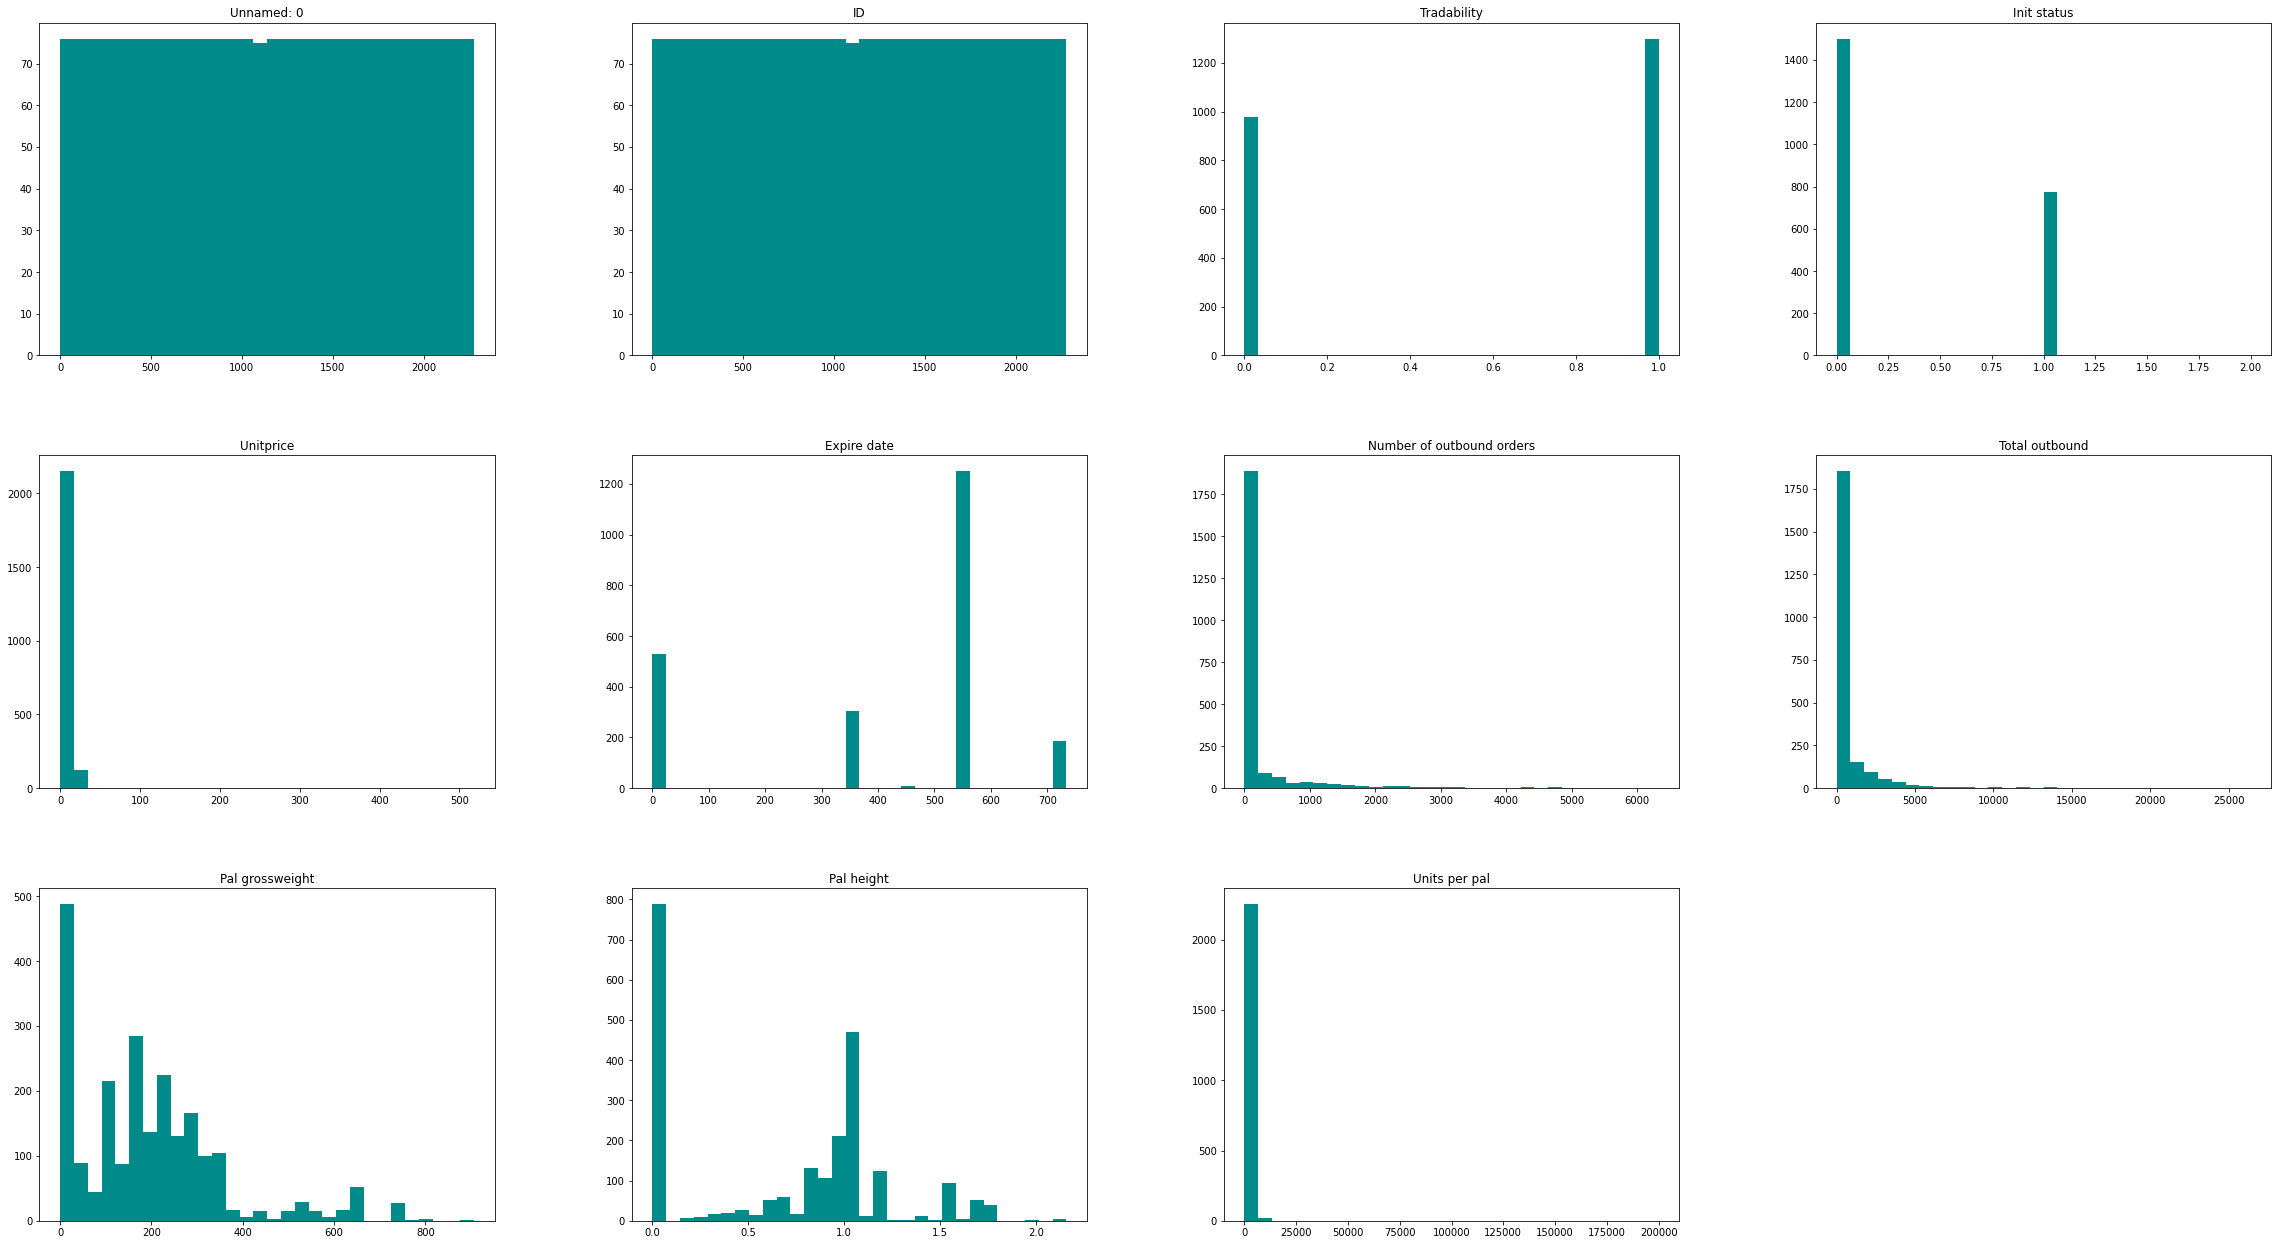

In [883]:
#Exploratory Data Analysis
df.hist(bins = 30 , layout = (4,4), figsize = (40,30)  ,column = df.columns[0:], color= "DarkCyan", grid = False)
plt.show()

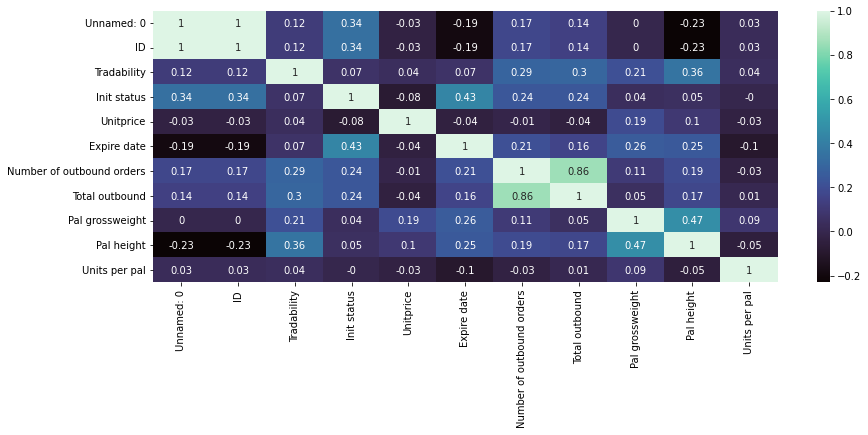

In [884]:
#Co-relation of all columns
import seaborn as sns
df_corr= df.corr()

plt.figure(figsize = (14,5))
sns.heatmap(round(df_corr,2),annot=True,cmap = 'mako')

In [885]:
df.drop(['Unnamed: 0', 'ID', 'Tradability', 'Init status'], axis=1, inplace=True)
df.head()


,Unitprice,Expire date,Number of outbound orders,Total outbound,Pal grossweight,Pal height,Units per pal
0,0.058,547,9,2441.0,105.60,1.56,1920
1,0.954,547,0,0.0,207.68,1.00,384
2,2.385,547,12,23.0,165.78,1.02,108
3,5.100,547,0,0.0,221.04,1.05,72
4,0.000,547,0,0.0,0.00,0.00,0


In [886]:
#finding missing values 
df.replace(0,np.nan, inplace=True) 
df.head()

,Unitprice,Expire date,Number of outbound orders,Total outbound,Pal grossweight,Pal height,Units per pal
0,0.058,547.0,9.0,2441.0,105.60,1.56,1920.0
1,0.954,547.0,NaN,NaN,207.68,1.00,384.0
2,2.385,547.0,12.0,23.0,165.78,1.02,108.0
3,5.100,547.0,NaN,NaN,221.04,1.05,72.0
4,NaN,547.0,NaN,NaN,NaN,NaN,NaN


In [887]:
countUP= df['Unitprice'].isnull().sum()
countPG= df['Pal grossweight'].isnull().sum()
countPH= df['Pal height'].isnull().sum()
countUPP= df['Units per pal'].isnull().sum()

print("Number of missing values in Unitprice:" ,countUP)
print("Number of missing values in Pal Grossweight:",countPG)
print("Number of missing values in Pal Height:",countPH)
print("Number of missing values in Units per pal:",countUPP)


Number of missing values in Unitprice: 710
Number of missing values in Pal Grossweight: 371
Number of missing values in Pal Height: 787
Number of missing values in Units per pal: 295


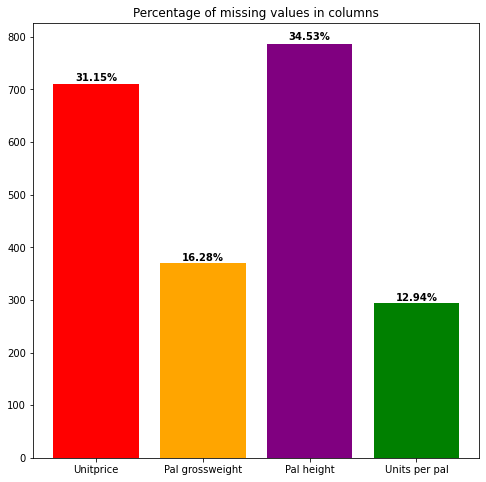

In [888]:
data = pd.DataFrame({'lab':['Unitprice', 'Pal grossweight', 'Pal height','Units per pal' ], 'val':[countUP, countPG, countPH, countUPP]})
percentage = []

for i in range(data.shape[0]):
    total=len(df)
    pct = (data.val[i] / total) * 100
    percentage.append(round(pct,2))
data['Percentage'] = percentage

plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Purple', 'green']
graph = plt.bar(data.lab,data.val, color = colors_list)
plt.title('Percentage of missing values in columns')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

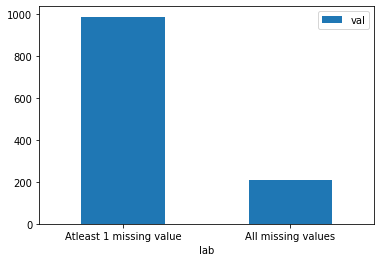

In [889]:
value1 = df[['Unitprice','Pal grossweight', 'Pal height','Units per pal']].isnull().values.any(axis=1).sum()
value1
value2 = df[['Unitprice','Pal grossweight', 'Pal height','Units per pal']].isnull().values.all(axis=1).sum()
value2

data = pd.DataFrame({'lab':['Atleast 1 missing value', 'All missing values'], 'val':[value1, value2]})
ax = data.plot.bar(x='lab', y='val', rot=0)

In [890]:
df.isna().any()

Unitprice                    True
Expire date                  True
Number of outbound orders    True
Total outbound               True
Pal grossweight              True
Pal height                   True
Units per pal                True
dtype: bool

In [891]:
#K-NNI imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)   
df.head() 

,Unitprice,Expire date,Number of outbound orders,Total outbound,Pal grossweight,Pal height,Units per pal
0,0.0580,547.0,9.0,2441.0,105.600,1.56,1920.0
1,0.9540,547.0,811.4,1806.1,207.680,1.00,384.0
2,2.3850,547.0,12.0,23.0,165.780,1.02,108.0
3,5.1000,547.0,157.0,266.5,221.040,1.05,72.0
4,0.9042,547.0,1222.8,3442.5,245.632,0.94,384.0


In [892]:
df.isna().any()

Unitprice                    False
Expire date                  False
Number of outbound orders    False
Total outbound               False
Pal grossweight              False
Pal height                   False
Units per pal                False
dtype: bool

In [893]:
df.head()

,Unitprice,Expire date,Number of outbound orders,Total outbound,Pal grossweight,Pal height,Units per pal
0,0.0580,547.0,9.0,2441.0,105.600,1.56,1920.0
1,0.9540,547.0,811.4,1806.1,207.680,1.00,384.0
2,2.3850,547.0,12.0,23.0,165.780,1.02,108.0
3,5.1000,547.0,157.0,266.5,221.040,1.05,72.0
4,0.9042,547.0,1222.8,3442.5,245.632,0.94,384.0


In [894]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df)
X

array([[-0.43655667,  0.15153833, -0.54955364, ..., -0.87675278,
         1.75976015,  0.17325402],
       [-0.3897814 ,  0.15153833,  0.5180578 , ..., -0.20292215,
        -0.02650936, -0.07151057],
       [-0.31507671,  0.15153833, -0.54556207, ..., -0.47950427,
         0.03728598, -0.11549171],
       ...,
       [ 1.47984834, -1.19764956, -0.55806899, ..., -1.32060438,
        -1.58949517, -0.13206431],
       [ 3.90173942, -0.61836716, -0.56019782, ..., -1.40806771,
        -1.14930733, -0.13222367],
       [-0.39536938,  0.15153833, -0.46040862, ..., -0.87675278,
         1.52690716,  0.17325402]])

In [895]:
#Z-score standardization and removing outliers
import scipy.stats as stats
z_scores = stats.zscore(df)
z_scores.max()
z_scores.min()
#df = df.select_dtypes(include='number').apply(stats.zscore)
#print(df.head())

df_11 = df

In [896]:
df.shape

(2279, 7)

In [897]:
# Convert to absolute values
abs_z_scores = np.abs(z_scores)

# Select data points with a z-scores above or below 3
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Filter the dataset
df = df[filtered_entries]
df.shape
df

#Standard Scalar for scalling all the columns
#Snippet on the slide after all data pre-processing.


,Unitprice,Expire date,Number of outbound orders,Total outbound,Pal grossweight,Pal height,Units per pal
0,0.05800,547.0,9.0,2441.0,105.600,1.560,1920.0
1,0.95400,547.0,811.4,1806.1,207.680,1.000,384.0
2,2.38500,547.0,12.0,23.0,165.780,1.020,108.0
3,5.10000,547.0,157.0,266.5,221.040,1.050,72.0
4,0.90420,547.0,1222.8,3442.5,245.632,0.940,384.0
...,...,...,...,...,...,...,...
2272,64.06600,401.4,5.8,10.4,2.700,0.512,10.0
2273,64.06600,401.4,5.8,10.4,2.700,0.512,10.0
2274,64.06600,401.4,5.8,10.4,2.700,0.512,10.0
2276,36.76755,419.6,2.6,3.4,38.360,0.510,4.0


In [898]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(df)
# X


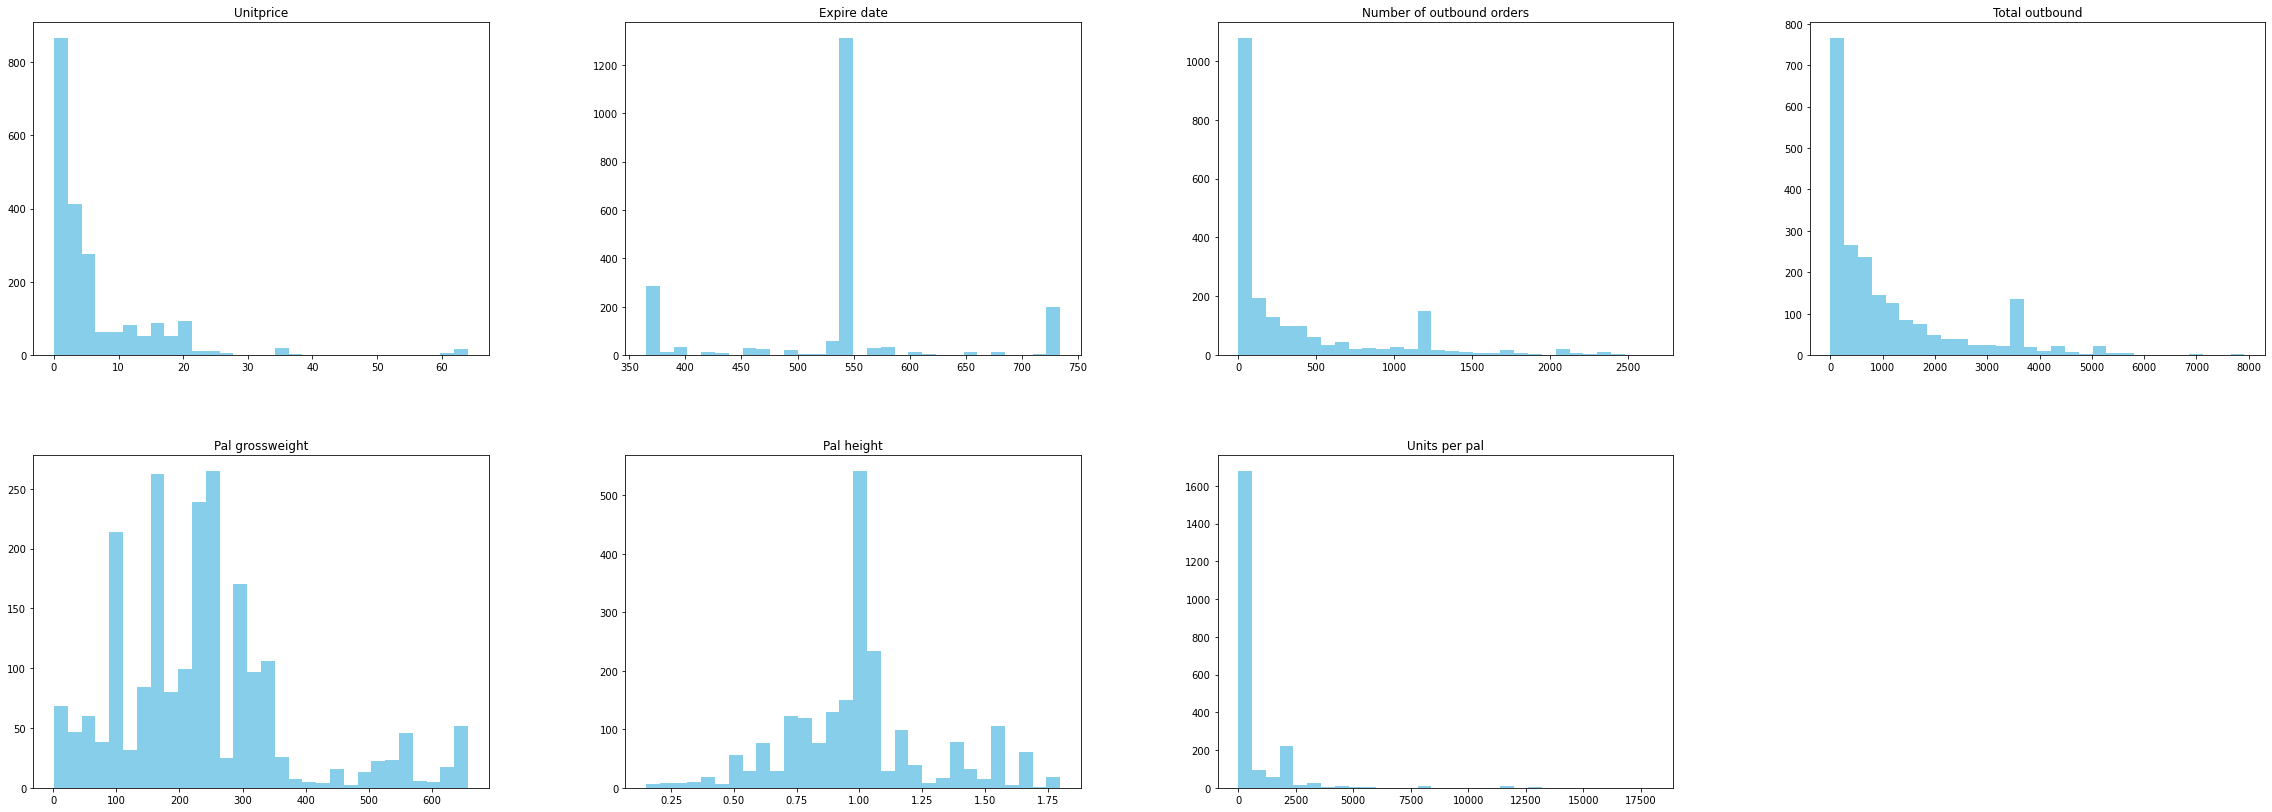

In [899]:
df.hist(bins = 30 , layout = (4,4), figsize = (40,30)  ,column = df.columns[0:], color= "skyblue", grid = False)
plt.show()

In [900]:
#varshini

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = list(range(2,20))
scores = []
val = np.ndarray(shape=(1,2))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    scores.append(silhouette_avg)
    val = np.concatenate((val,[[n_clusters,silhouette_avg]]),axis=0)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)


For n_clusters = 2 The average silhouette_score is : 0.3158742665207127
For n_clusters = 3 The average silhouette_score is : 0.38363958580302615
For n_clusters = 4 The average silhouette_score is : 0.4525643245202019
For n_clusters = 5 The average silhouette_score is : 0.40831561178613984
For n_clusters = 6 The average silhouette_score is : 0.36988677949898713
For n_clusters = 7 The average silhouette_score is : 0.33847455433163076
For n_clusters = 8 The average silhouette_score is : 0.3768012108378928
For n_clusters = 9 The average silhouette_score is : 0.3922974903882196
For n_clusters = 10 The average silhouette_score is : 0.4105965614880029
For n_clusters = 11 The average silhouette_score is : 0.42964181174685406
For n_clusters = 12 The average silhouette_score is : 0.43611019329637063
For n_clusters = 13 The average silhouette_score is : 0.424468387884918
For n_clusters = 14 The average silhouette_score is : 0.4260797186550685
For n_clusters = 15 The average silhouette_score is : 

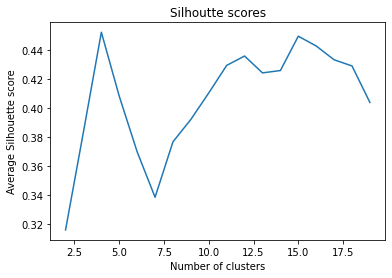

In [901]:
plt.plot(range(2,20), scores)
plt.title('Silhoutte scores')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette score')
plt.show()

[5 5 5 ... 0 6 5]


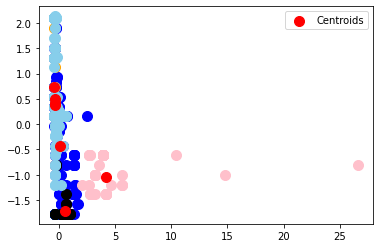

In [902]:
#Krishna 
#without PCA

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#X = df_11
y_kmeans = kmeans.fit_predict(X)
y_kmeans

print(y_kmeans)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'black')

plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'skyblue')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'pink')

#plt.scatter(x[y_kmeans == 10, 0], x[y_kmeans == 10, 1], s = 100, c = '#8470FF')
#plt.scatter(x[y_kmeans == 11, 0], x[y_kmeans == 11, 1], s = 100, c = '#FFFAFA')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [903]:
#Performance Metrices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

labels_1 = y_kmeans
 
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels_1))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels_1))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels_1))

Silhouette Coefficient: 0.338
Calinski-Harabasz Index: 805.016
Davies-Bouldin Index: 0.877


In [904]:
#Niti
#DBSCAN without PCA

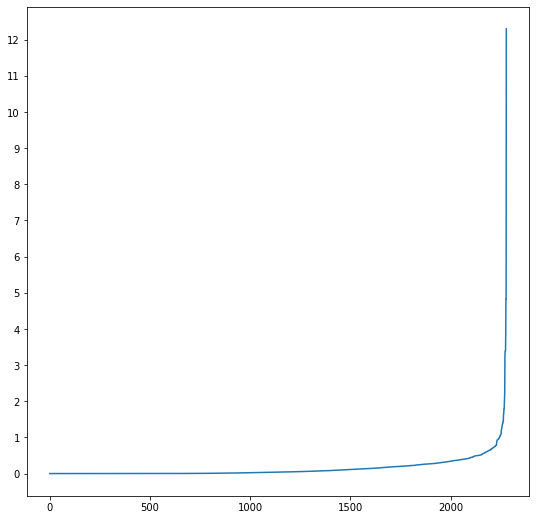

In [905]:
#Niti
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(9,9))
plt.plot(distances)
plt.locator_params(axis='y', tight=True,nbins = 20)
plt.show()
#5
#0.5

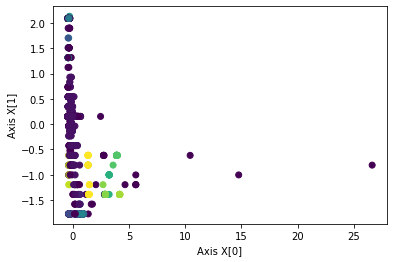

<Figure size 648x648 with 0 Axes>

23


In [906]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize

#analysing the above curvature 
eps_value = 0.5

# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = eps_value, min_samples = 6).fit(X)
labels = db_default.labels_

plt.scatter(X[:,0], X[:,1], c=labels, label=y)
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.figure(figsize =(9, 9))
plt.show()

num_clusters = len(set(labels))
print(num_clusters)

In [907]:
#Anand's PCA part
df_pca = df #Anand : do not alter the variable in the code, I am using it for PCA 
df_pca.head() #Do not use the varaible - Anand
#df_pca.drop(['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1, inplace=True)#Do not use the varaible - Anand
#df_pca.head()

,Unitprice,Expire date,Number of outbound orders,Total outbound,Pal grossweight,Pal height,Units per pal
0,0.0580,547.0,9.0,2441.0,105.600,1.56,1920.0
1,0.9540,547.0,811.4,1806.1,207.680,1.00,384.0
2,2.3850,547.0,12.0,23.0,165.780,1.02,108.0
3,5.1000,547.0,157.0,266.5,221.040,1.05,72.0
4,0.9042,547.0,1222.8,3442.5,245.632,0.94,384.0


In [908]:
df_pca.describe()

,Unitprice,Expire date,Number of outbound orders,Total outbound,Pal grossweight,Pal height,Units per pal
count,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000
mean,6.446655,535.020386,346.739480,1062.865073,235.353306,1.008005,618.920683
std,9.202491,92.780772,520.127031,1305.774427,138.650036,0.294422,1306.804721
min,0.003300,365.000000,1.000000,1.000000,0.800000,0.150000,1.000000
25%,0.976500,547.000000,8.000000,73.250000,148.000000,0.840000,72.000000
50%,2.898500,547.000000,85.000000,577.600000,226.800000,1.020000,153.600000
75%,8.029400,547.000000,443.750000,1500.000000,293.760000,1.050000,384.000000
max,64.066000,734.000000,2656.000000,7920.000000,657.720000,1.800000,18000.000000


In [909]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) #tell pca to convert in 2 dimensions
print("Shape before PCA:" ,X.shape)

x_pca = pca.fit_transform(X);
print("Shape after PCA:" ,x_pca.shape)
pca.explained_variance_ratio_
print(x_pca)

# we should call K-Means 
#call Kmeans using df val1: KMeans(df)
#call DBScan using df val2: DBScan(df)

#Calculate PCA

#Reason for doing PCA in presentation

# we should call K-Means 
#call Kmeans using x_pca val3: KMeans(x_pca)
#call DBScan using x_pca val4: DBScan(x_pca)

#Compare val1 and val3
#Compare val2 and val4

Shape before PCA: (2279, 7)
Shape after PCA: (2279, 2)
[[ 0.14913839 -0.54289081]
 [ 0.64825463  0.06071391]
 [-0.5207626   0.46834199]
 ...
 [-1.41976272  1.69277095]
 [-1.96385408  1.86187928]
 [-0.0422638  -0.34755693]]


In [910]:
x_principalDf = pd.DataFrame(data = x_pca
             , columns = ['P1', 'P2'])
finalDf = x_principalDf
x_principalDf.head()


,P1,P2
0,0.149138,-0.542891
1,0.648255,0.060714
2,-0.520763,0.468342
3,-0.405074,0.142604
4,1.440180,-0.158810


In [911]:
# fig = plt.figure(figsize = (8,8))


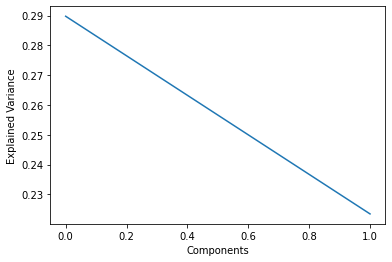

In [912]:
import pandas
from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plot
plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

In [913]:
#Niti
#DBSCAN after pca
#analysing the above curvature 
eps_value = 0.5

X_principal = x_principalDf

# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = eps_value, min_samples = 5).fit(X_principal)
labels = db_default.labels_

print(labels)
num_clusters = len(set(labels))
print(num_clusters)

colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)


[0 0 0 ... 0 0 0]
6


KeyError: ignored

In [ ]:
df.shape[0]

In [ ]:
db_default.labels_

In [ ]:
np.unique(labels)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = list(range(2,20))

val = np.ndarray(shape=(1,2))
scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_pca)
    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    scores.append(silhouette_avg)
    val = np.concatenate((val,[[n_clusters,silhouette_avg]]),axis=0)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)


In [ ]:
plt.plot(range(2,20), scores)
plt.title('Silhoutte scores')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score') #within cluster sum of squares
plt.show()

In [ ]:
val

In [ ]:
#Krishna

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_pca)
y_kmeans
plt.scatter(x_pca[y_kmeans == 0, 0], x_pca[y_kmeans == 0, 1], s = 100, c = 'blue')
plt.scatter(x_pca[y_kmeans == 1, 0], x_pca[y_kmeans == 1, 1], s = 100, c = 'orange')
plt.scatter(x_pca[y_kmeans == 2, 0], x_pca[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(x_pca[y_kmeans == 3, 0], x_pca[y_kmeans == 3, 1], s = 100, c = 'yellow')
plt.scatter(x_pca[y_kmeans == 4, 0], x_pca[y_kmeans == 4, 1], s = 100, c = 'black')

plt.scatter(x_pca[y_kmeans == 5, 0], x_pca[y_kmeans == 5, 1], s = 100, c = 'skyblue')
plt.scatter(x_pca[y_kmeans == 6, 0], x_pca[y_kmeans == 6, 1], s = 100, c = 'pink')

#plt.scatter(x[y_kmeans == 10, 0], x[y_kmeans == 10, 1], s = 100, c = '#8470FF')
#plt.scatter(x[y_kmeans == 11, 0], x[y_kmeans == 11, 1], s = 100, c = '#FFFAFA')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()



In [ ]:
#Performance Metrices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score


X = x_pca
labels = y_kmeans
 
print("Silhouette Coefficient after PCA: %0.3f" % silhouette_score(X, labels))
print("Calinski-Harabasz Index after PCA: %0.3f" % calinski_harabasz_score(X, labels))
print("Davies-Bouldin Index after PCA: %0.3f" % davies_bouldin_score(X, labels))